In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [17]:
pc = pd.read_csv("petrol1_consumption.csv")

pc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9,3571,1976,0.525,541
1,9,4092,1250,0.572,524
2,9,3865,1586,0.580,561
3,8,4870,2351,0.529,414
4,8,4399,431,0.544,410


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.005274,-0.369958,-0.387233,-0.430035
Average_income,0.005274,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.369958,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.387233,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.430035,-0.244862,0.019042,0.698965,1.000000


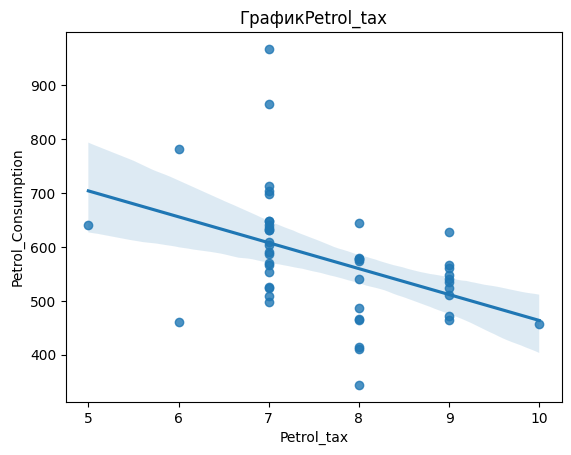

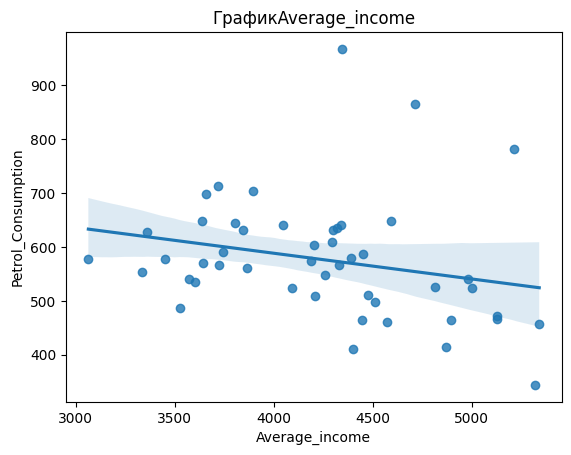

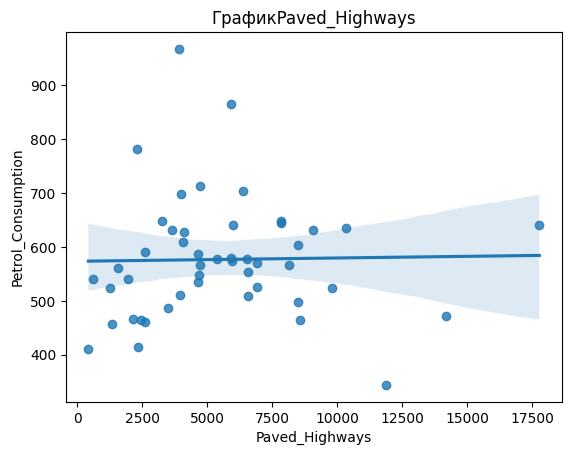

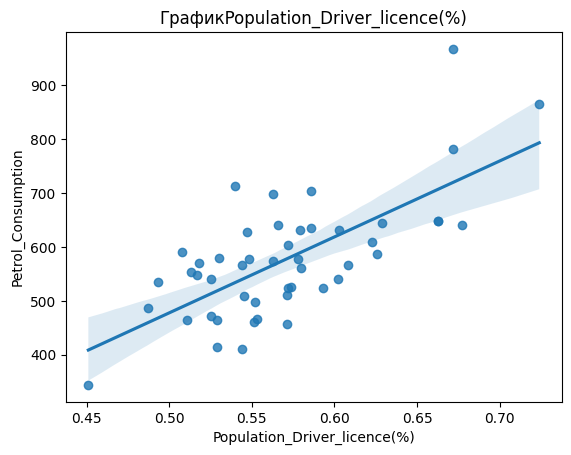

In [18]:
datas_colum = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
data_con = ['Petrol_Consumption']


for i in datas_colum:
    plt.figure()
    sns.regplot(x=i, y='Petrol_Consumption', data=pc).set(title = f"График{i}")

cor = pc.corr()
cor

[Text(0.5, 1.0, 'Кореляция')]

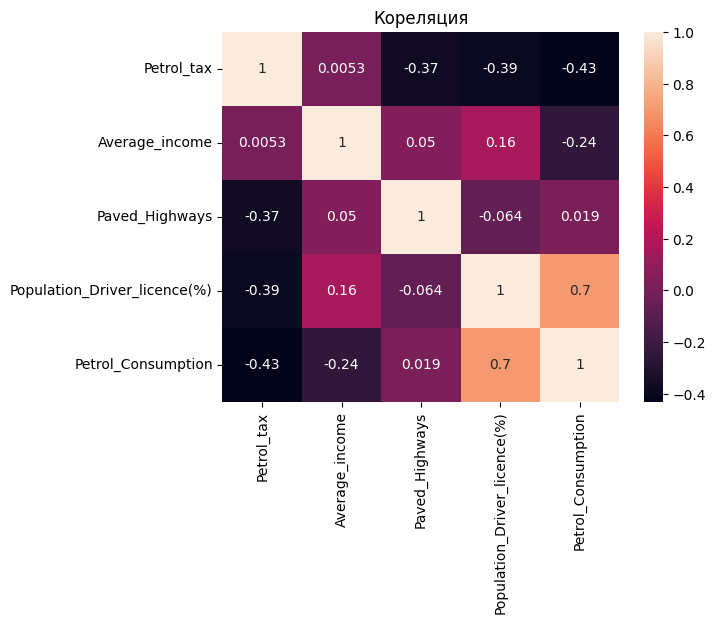

In [19]:
sns.heatmap(cor, annot=True).set(title='Кореляция')

In [20]:
y = pc["Petrol_Consumption"]
X = pc[["Petrol_tax","Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]
pc.shape

(48, 5)

In [21]:
A = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=A)

In [22]:
regression = LinearRegression()
regression.fit(X_train, y_train)

print("Beata_0: ", regression.intercept_)
print("Beata_n: ", regression.coef_)

Beata_0:  994.765076580846
Beata_n:  [-5.54694123e+01 -1.38522890e-01  7.21756225e-03  9.43643227e+02]


In [25]:
y_pred = regression.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
res.head()

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean_absolute_error {mae:.2f}")
print(f"mean_squared_error {mse:.2f}")
print(f"Root mean squared error {rmse:.2f}")
print()
print(regression.score(X_test, y_test))
print(regression.score(X_train, y_train))

Mean_absolute_error 79.53
mean_squared_error 10606.98
Root mean squared error 102.99

0.11335428272260328
0.8284806572144399


--------------------------------------

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [145]:
df = pd.read_csv('student_scores.csv')

x = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores'])

In [146]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'dependent')

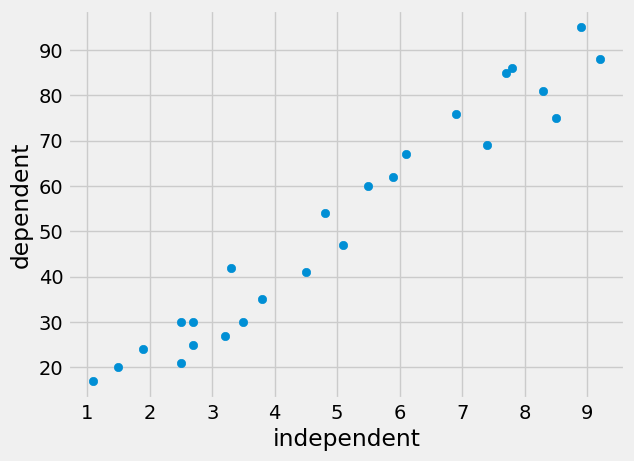

In [147]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y)
plt.xlabel('independent')
plt.ylabel('dependent')

<AxesSubplot: >

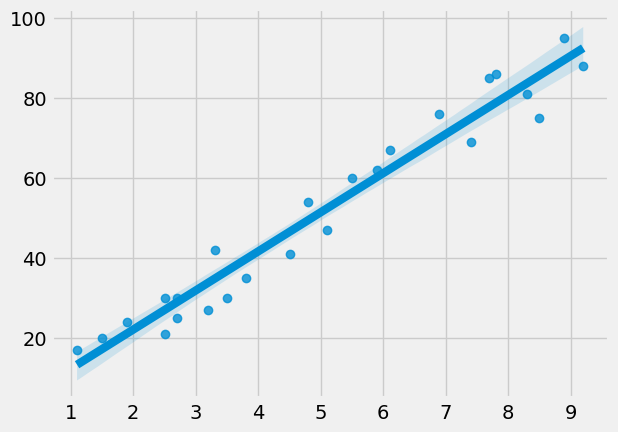

In [148]:
sns.regplot(x=x, y=y) 

In [149]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [150]:
print(f' B_0                         : {model.intercept_}')
print(f' B_1                         : {model.coef_}')
print(f' R2 determination-coefficient: {model.score(x, y)}')

 B_0                         : 2.48367340537321
 B_1                         : [9.77580339]
 R2 determination-coefficient: 0.9529481969048356


In [151]:
y_pred = model.predict(x)
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [152]:
print(f' MAE: {mean_absolute_error(y, y_pred)}')
print(f' MSE: {mean_squared_error(y, y_pred)}')

 MAE: 4.972805319866375
 MSE: 28.882730509245466


Text(0, 0.5, 'independent')

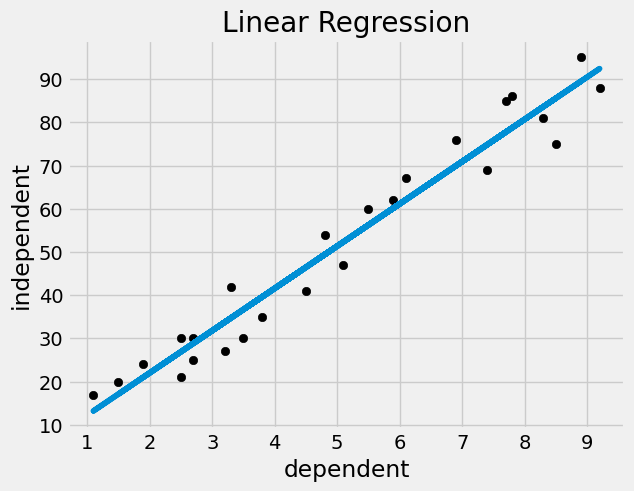

In [153]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
plt.plot(x, y_pred)
plt.title('Linear Regression')
plt.xlabel('dependent')
plt.ylabel('independent')

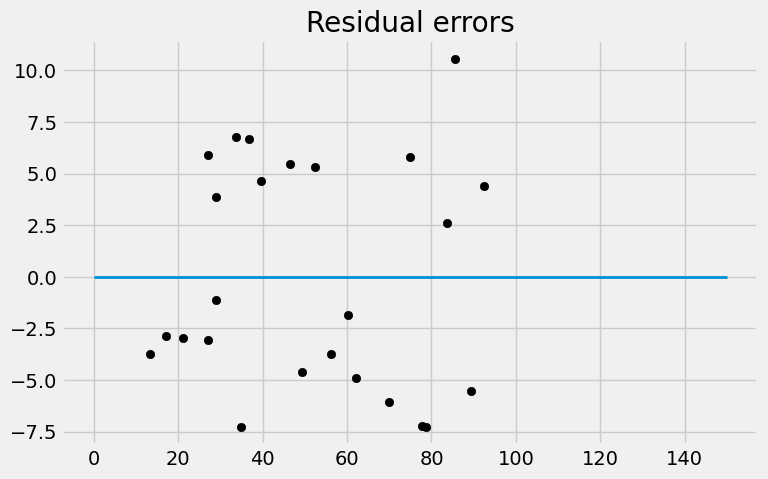

In [159]:
plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.scatter(x=y_pred, y=y_pred - y, color='black')
plt.hlines(y=0, xmin=0, xmax=150 ,linewidth=2)
plt.title("Residual errors") 
plt.show() 

------------------------------------------------

----------------------

In [17]:
data = pd.read_csv('petrol1_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9,3571,1976,0.525,541
1,9,4092,1250,0.572,524
2,9,3865,1586,0.580,561
3,8,4870,2351,0.529,414
4,8,4399,431,0.544,410


In [18]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.005274,-0.369958,-0.387233,-0.430035
Average_income,0.005274,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.369958,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.387233,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.430035,-0.244862,0.019042,0.698965,1.000000


In [103]:
X = data.iloc[:,0:4:]
Y = data.iloc[::,4]

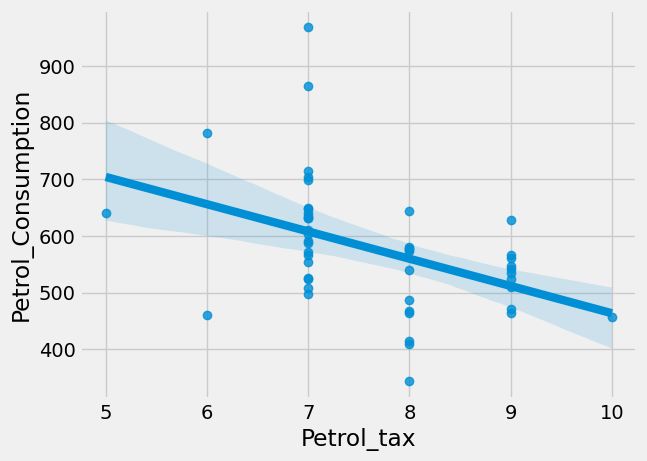

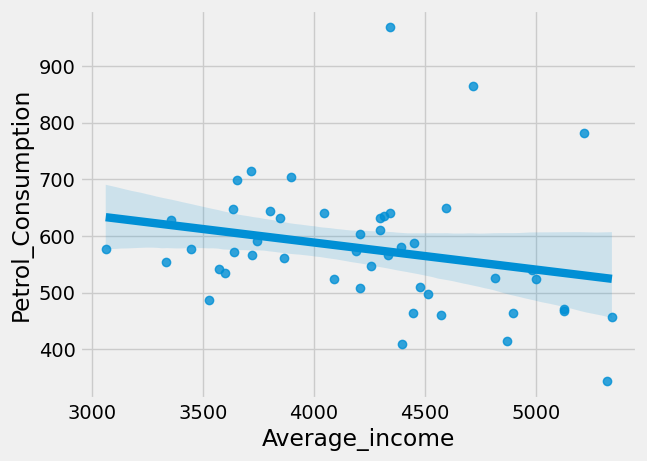

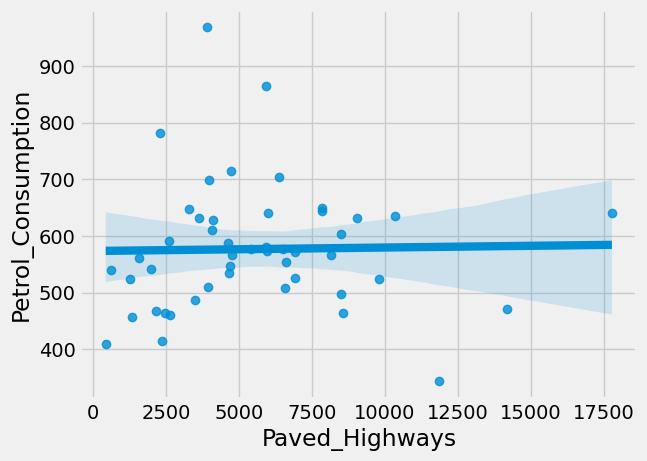

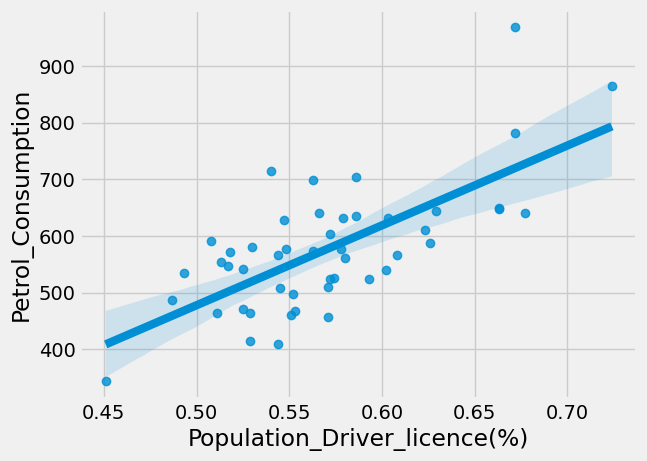

In [104]:
for i in X:
    plt.figure()
    sns.regplot(x=X[i], y=Y, data=data)
    

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [116]:
model_plenty_l = LinearRegression()
model_plenty_l.fit(x_train, y_train)

LinearRegression()

In [130]:
Y_pred = model_plenty_l.predict(x_test)

In [131]:
print(f' B_0: {model_plenty_l.intercept_}')
print(f' B_1: {model_plenty_l.coef_}')
print(f' B_0: {model_plenty_l.score(x_test, y_test)}')

 B_0: 409.0914608137176
 B_1: [-3.12035186e+01 -4.10510977e-02 -1.99504934e-03  1.04300300e+03]
 B_0: 0.53895278120623


In [133]:
print(mean_absolute_error(y_test, Y_pred))

75.72154782713095


In [134]:
print(mean_squared_error(y_test, Y_pred))

9694.314874552836


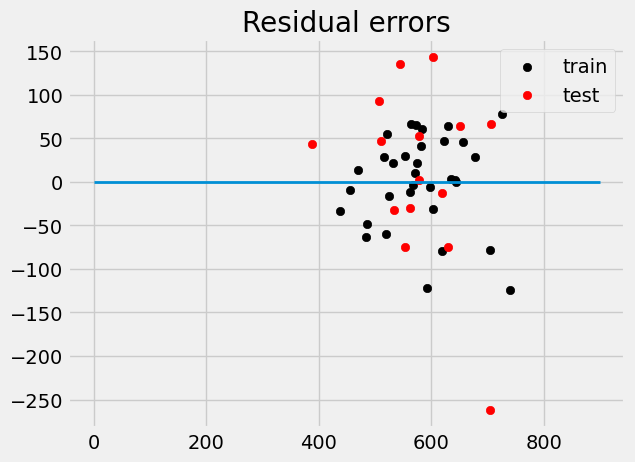

In [143]:
plt.style.use('fivethirtyeight')
plt.scatter(x=model_plenty_l.predict(x_train), y=model_plenty_l.predict(x_train) - y_train, color='black', label='train')
plt.scatter(x=model_plenty_l.predict(x_test), y=model_plenty_l.predict(x_test) - y_test, color='red', label='test')
plt.hlines(y=0, xmin=0, xmax=900 ,linewidth=2)
plt.legend(loc='upper right') 
plt.title("Residual errors") 
plt.show() 